## DFL with LeNet on DNA Sequence Dataset

By: Sk. Tanzir Mehedi

In [ ]:
import urllib.request

def download_url(url, save_as):
    response = urllib.request.urlopen(url)
    data = response.read()
    file = open(save_as, 'wb')
    file.write(data)
    file.close()
    response.close()
    
def read_binary_file(file):
    f = open(file,'rb')
    block = f.read()
    return block.decode('utf-16')

def split_text_in_lines(text):
    return text.split('\r\n')

def split_by_tabs(line):
    return line.split('\t')

In [ ]:
names_link = 'https://raw.githubusercontent.com/tanzirmehedi/Deep-Federated-Learning/main/preprocessedDNASequenceDataset.names'
data_link = 'https://raw.githubusercontent.com/tanzirmehedi/Deep-Federated-Learning/main/preprocessedDNASequenceDataset.data'

diagnosis_names = 'preprocessedDNASequenceDataset.names'
diagnosis_data = 'preprocessedDNASequenceDataset.data'
download_url(names_link, diagnosis_names)
download_url(data_link, diagnosis_data)

In [ ]:
import numpy as np

def parse_double(field):
    field = field.replace(',', '.')
    return float(field)

def parse_boolean(field):
    return 1. if field == 'yes' else 0.

def read_np_array(file = diagnosis_data):
    text = read_binary_file(file)
    lines = split_text_in_lines(text)
    rows = []
    for line in lines:
        if line == '': continue
        line = line.replace('\r\n', '')
        fields = split_by_tabs(line)
        row = []
        j = 0
        for field in fields:
            value = parse_double(field) if j == 0 else parse_boolean(field)
            row.append(value)
            j += 1
        rows.append(row)
    matrix = np.array(rows, dtype = np.float32)
    return matrix


In [ ]:
matrix = read_np_array()
matrix

array([[35.5,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [35.9,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [35.9,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36. ,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [36. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36.2,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [36.2,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36.3,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [36.6,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [36.6,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [36.6,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36.6,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36.7,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [36.7,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36.7,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36.8,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [36.8,  0. ,  0. ,  1. ,

In [ ]:
n_samples, n_dimensions = matrix.shape
print(n_samples)
print(n_dimensions)

120
8


In [ ]:
def get_random_indexes(n):
    indexes = list(range(n))
    random_indexes = []
    for i in range(n):
        r = np.random.randint(len(indexes))
        random_indexes.append(indexes.pop(r))
    return random_indexes

def get_indexes_for_2_datasets(n, training = 80):
    indexes = get_random_indexes(n)
    train = int(training / 100. * n)
    return indexes[:train], indexes[train:]

matrix = read_np_array()
n_samples, n_dimensions = matrix.shape

train_indexes, test_indexes = get_indexes_for_2_datasets(n_samples)
train_data = matrix[train_indexes]
test_data = matrix[test_indexes]

def print_dataset(name, data):
    print('Dataset {}. Shape: {}'.format(name, data.shape))
    print(data)

In [ ]:
print(len(train_data))
print(len(test_data))
print(train_indexes)
print(test_indexes)

96
24
[79, 91, 50, 16, 14, 52, 64, 89, 31, 108, 46, 78, 73, 58, 109, 114, 99, 1, 55, 26, 15, 86, 87, 110, 93, 77, 94, 85, 28, 82, 2, 34, 95, 45, 47, 103, 23, 27, 48, 98, 39, 111, 119, 6, 97, 9, 115, 63, 69, 62, 30, 36, 75, 18, 29, 61, 25, 24, 4, 90, 104, 84, 0, 22, 60, 10, 107, 41, 76, 80, 19, 20, 67, 66, 100, 3, 59, 113, 70, 116, 57, 102, 11, 74, 117, 44, 5, 8, 54, 7, 83, 56, 40, 51, 38, 96]
[42, 81, 17, 68, 32, 65, 35, 118, 71, 33, 21, 13, 37, 106, 88, 72, 105, 101, 43, 49, 53, 12, 112, 92]


In [ ]:
print_dataset('Train', train_data)

Dataset Train. Shape: (96, 8)
[[40.2  1.   1.   1.   1.   1.   1.   1. ]
 [40.6  1.   1.   0.   1.   0.   0.   1. ]
 [37.7  0.   1.   0.   0.   0.   0.   0. ]
 [36.8  0.   0.   1.   1.   1.   1.   0. ]
 [36.7  0.   1.   0.   0.   0.   0.   0. ]
 [37.8  0.   1.   0.   0.   0.   0.   0. ]
 [38.5  0.   1.   1.   0.   1.   0.   1. ]
 [40.6  1.   1.   1.   1.   1.   1.   1. ]
 [37.2  0.   0.   1.   1.   0.   1.   0. ]
 [41.1  1.   1.   0.   1.   0.   0.   1. ]
 [37.6  0.   0.   1.   1.   0.   1.   0. ]
 [40.1  1.   1.   1.   1.   0.   1.   1. ]
 [40.   0.   0.   0.   0.   0.   0.   0. ]
 [37.9  0.   0.   1.   1.   1.   1.   0. ]
 [41.1  0.   1.   1.   0.   1.   0.   1. ]
 [41.3  1.   1.   1.   1.   0.   1.   1. ]
 [40.9  1.   1.   1.   1.   0.   1.   1. ]
 [35.9  0.   0.   1.   1.   1.   1.   0. ]
 [37.9  0.   0.   1.   1.   0.   1.   0. ]
 [37.   0.   0.   1.   1.   1.   1.   0. ]
 [36.7  0.   1.   0.   0.   0.   0.   0. ]
 [40.4  0.   0.   0.   0.   0.   0.   0. ]
 [40.4  1.   1.   0.   1

In [ ]:
print_dataset('Test', test_data)

Dataset Test. Shape: (24, 8)
[[37.5  0.   0.   1.   1.   1.   1.   0. ]
 [40.2  1.   1.   0.   1.   0.   0.   1. ]
 [36.8  0.   0.   1.   1.   1.   1.   0. ]
 [39.4  0.   1.   1.   0.   1.   0.   1. ]
 [37.2  0.   1.   0.   0.   0.   0.   0. ]
 [38.7  0.   1.   1.   0.   1.   0.   1. ]
 [37.3  0.   0.   1.   1.   1.   1.   0. ]
 [41.5  0.   1.   1.   0.   1.   0.   1. ]
 [40.   1.   1.   1.   1.   1.   1.   1. ]
 [37.2  0.   0.   1.   0.   0.   1.   0. ]
 [37.   0.   0.   1.   1.   0.   1.   0. ]
 [36.7  0.   0.   1.   1.   1.   1.   0. ]
 [37.4  0.   1.   0.   0.   0.   0.   0. ]
 [41.1  1.   1.   1.   1.   0.   1.   1. ]
 [40.5  1.   1.   1.   1.   0.   1.   1. ]
 [40.   1.   1.   1.   1.   0.   1.   1. ]
 [41.1  1.   1.   1.   1.   1.   1.   1. ]
 [41.   1.   1.   1.   1.   1.   1.   1. ]
 [37.5  0.   0.   1.   0.   0.   1.   0. ]
 [37.7  0.   0.   1.   1.   0.   1.   0. ]
 [37.8  0.   0.   1.   1.   1.   1.   0. ]
 [36.6  0.   1.   0.   0.   0.   0.   0. ]
 [41.2  1.   1.   0.   1.

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

input_size = 64
learning_rate = 0.01
num_iterations = 1000

class LogisticRegression(torch.nn.Module):

    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


In [ ]:
def decide(y):
    return 1. if y >= 0.5 else 0.

decide_vectorized = np.vectorize(decide)

to_percent = lambda x: '{:.2f}%'.format(x)

def compute_accuracy(model, input, output):
    prediction = model(input).data.numpy()[:, 0]
    n_samples = prediction.shape[0] + 0.
    prediction = decide_vectorized(prediction)
    equal = prediction == output.data.numpy()
    return 100. * equal.sum() / n_samples

def get_input_and_output(data):
    input = Variable(torch.tensor(data[:, :6], dtype = torch.float32))
    output = Variable(torch.tensor(data[:, 6], dtype = torch.float32))
    #output = Variable(torch.tensor(data[:, 6], dtype = torch.float32)[..., None])

    return input, output

input, output= get_input_and_output(train_data)
test_input, test_output = get_input_and_output(test_data)

import matplotlib.pyplot as plt
%matplotlib inline

DFL_title = 'DFL with LeNet on DNA Sequence Dataset'


def plot_graphs(DFL_title, losses, accuracies):
    plt.plot(losses)
    plt.title(f"{DFL_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    plt.plot(accuracies)
    plt.title(f"{DFL_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()
    
def train_model(DFL_title, input, output, test_input, test_output):
    model = LogisticRegression()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
    losses = []
    accuracies = []
    n_samples, _ = input.shape
    for iteration in range(num_iterations):
            optimizer.zero_grad()
            prediction = model(input)
            loss = criterion(prediction, output)
            loss.backward()
            optimizer.step()
            if iteration % 500 == 0:
                train_acc = compute_accuracy(model, input, output)
                train_loss = loss.item()
                losses.append(train_loss)
                accuracies.append(train_acc)
                print('iteration={}, loss={:.4f}, train_acc={}'.format(iteration, train_loss, to_percent(train_acc)))
    plot_graphs(DFL_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([96])) that is different to the input size (torch.Size([96, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


iteration=0, loss=5.1054, train_acc=44.79%
iteration=500, loss=1.4609, train_acc=44.79%
iteration=1000, loss=0.8823, train_acc=62.50%
iteration=1500, loss=0.2649, train_acc=100.00%
iteration=2000, loss=0.1731, train_acc=100.00%
iteration=2500, loss=0.1566, train_acc=100.00%
iteration=3000, loss=0.1432, train_acc=100.00%
iteration=3500, loss=0.1321, train_acc=100.00%
iteration=4000, loss=0.1226, train_acc=100.00%
iteration=4500, loss=0.1145, train_acc=100.00%
iteration=5000, loss=0.1074, train_acc=100.00%
iteration=5500, loss=0.1012, train_acc=100.00%
iteration=6000, loss=0.0956, train_acc=100.00%
iteration=6500, loss=0.0907, train_acc=100.00%
iteration=7000, loss=0.0862, train_acc=100.00%
iteration=7500, loss=0.0822, train_acc=100.00%
iteration=8000, loss=0.0786, train_acc=100.00%
iteration=8500, loss=0.0752, train_acc=100.00%
iteration=9000, loss=0.0722, train_acc=100.00%
iteration=9500, loss=0.0693, train_acc=100.00%
iteration=10000, loss=0.0667, train_acc=100.00%
iteration=10500, lo

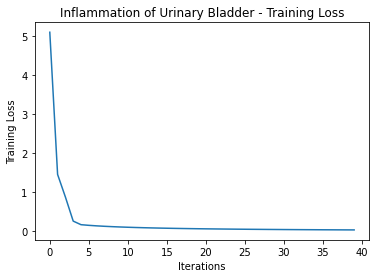

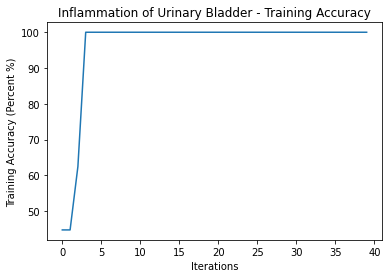


Testing Accuracy = 100.00%


In [ ]:
model = train_model(DFL_title, input, output, test_input, test_output)

In [ ]:
#pip install syft==0.2.9

     |████████████████████████████████| 433 kB 5.4 MB/s 
     |████████████████████████████████| 449 kB 44.7 MB/s 
     |████████████████████████████████| 2.0 MB 46.7 MB/s 
     |████████████████████████████████| 57 kB 3.9 MB/s 
     |████████████████████████████████| 4.0 MB 40.5 MB/s 
     |████████████████████████████████| 79 kB 6.6 MB/s 
     |████████████████████████████████| 1.8 MB 34.4 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 73 kB 2.0 MB/s 
     |████████████████████████████████| 9.0 MB 11.0 MB/s 
     |████████████████████████████████| 126 kB 67.7 MB/s 
     |████████████████████████████████| 753.4 MB 6.8 kB/s 
     |████████████████████████████████| 484 kB 64.6 MB/s 
     |████████████████████████████████| 200 kB 53.8 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 52 kB 583 kB/s 
     |████████████████████

In [ ]:
import syft as sy
import torch as th
hook = sy.TorchHook(th)
from torch import nn, optim

In [ ]:
local_client_devices = 6
client_devicess = []
for i in range(local_client_devices):
    local_client_devices_name = 'client_devices{}'.format(i)
    client_devices = sy.VirtualWorker(hook, id = local_client_devices_name)
    print(client_devices)
    print(str(client_devices._objects))
    client_devicess.append(client_devices)
secure_worker = sy.VirtualWorker(hook, id="secure_worker")
print(secure_worker)
print(secure_worker._objects)

def get_workers_names(workers):
    return [worker.id for worker in workers]

def add_and_print_workers(worker, workers):
    print('workers of {} = {}'.format(worker.id, get_workers_names(workers)))
    worker.add_workers(workers)

for i in range(local_client_devices):
    workers = [client_devicess[i2] for i2 in range(local_client_devices) if i2 != i] + [secure_worker]
    add_and_print_workers(client_devicess[i], workers)
add_and_print_workers(secure_worker, client_devicess)


Worker hospital1 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital2 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital3 already exists. Replacing old worker which could cause                     unexpected behavior
Worker secure_worker already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital0 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital2 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital3 already exists. Replacing old worker which could cause                     unexpected behavior
Worker secure_worker already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital0 already exists. Replacing old worker which could cause                     unex

<VirtualWorker id:hospital0 #objects:0>
{}
<VirtualWorker id:hospital1 #objects:0>
{}
<VirtualWorker id:hospital2 #objects:0>
{}
<VirtualWorker id:hospital3 #objects:0>
{}
<VirtualWorker id:secure_worker #objects:0>
{}
workers of hospital0 = ['hospital1', 'hospital2', 'hospital3', 'secure_worker']
workers of hospital1 = ['hospital0', 'hospital2', 'hospital3', 'secure_worker']
workers of hospital2 = ['hospital0', 'hospital1', 'hospital3', 'secure_worker']
workers of hospital3 = ['hospital0', 'hospital1', 'hospital2', 'secure_worker']
workers of secure_worker = ['hospital0', 'hospital1', 'hospital2', 'hospital3']


In [ ]:
n_samples = train_data.shape[0]
print(n_samples)
print(local_client_devices)
samples_per_client_devices = int((n_samples + 0.5) / local_client_devices)
print(samples_per_client_devices)

96
4
24


In [ ]:
client_devices_features = []
client_devices_targets = []

In [ ]:
train_data = th.tensor(train_data, dtype = torch.float32, requires_grad=True)
train_data

/usr/local/lib/python3.7/dist-packages/syft/frameworks/torch/hook/hook.py:560: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  current_tensor = hook_self.torch.native_tensor(*args, **kwargs)


tensor([[40.2000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
        [40.6000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [37.7000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [36.8000,  0.0000,  0.0000,  1.0000,  1.0000,  1.0000,  1.0000,  0.0000],
        [36.7000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [37.8000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [38.5000,  0.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [40.6000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
        [37.2000,  0.0000,  0.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [41.1000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [37.6000,  0.0000,  0.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [40.1000,  1.0000,  1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  1.0000],
        [40.0000

In [ ]:
for i in range(local_client_devices):
    train_data2 = train_data[i * samples_per_client_devices:(i + 1) * samples_per_client_devices].clone().detach().requires_grad_(True)
    features = train_data2[:, :6].clone().detach().requires_grad_(True)
    print(features)
    targets = train_data2[:, 6][:, None].clone().detach() 
    print(targets)
    client_devices_features.append(features.send(client_devicess[i]))
    print(client_devices_features)
    client_devices_targets.append(targets.send(client_devicess[i]))
    print(client_devices_features)

print(model)

tensor([[40.2000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
        [40.6000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [37.7000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000],
        [36.8000,  0.0000,  0.0000,  1.0000,  1.0000,  1.0000],
        [36.7000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000],
        [37.8000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000],
        [38.5000,  0.0000,  1.0000,  1.0000,  0.0000,  1.0000],
        [40.6000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
        [37.2000,  0.0000,  0.0000,  1.0000,  1.0000,  0.0000],
        [41.1000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [37.6000,  0.0000,  0.0000,  1.0000,  1.0000,  0.0000],
        [40.1000,  1.0000,  1.0000,  1.0000,  1.0000,  0.0000],
        [40.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [37.9000,  0.0000,  0.0000,  1.0000,  1.0000,  1.0000],
        [41.1000,  0.0000,  1.0000,  1.0000,  0.0000,  1.0000],
        [41.3000,  1.0000,  1.0000,  1.0

In [ ]:
def plot_federated_graphs(DFL_title, losses, accuracies):
    for i in range(local_client_devices):
        plt.plot(losses[i], label=f'client_devices {i}')
    legend = plt.legend(loc='upper right', shadow=True)
    plt.title(f"{DFL_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    for i in range(local_client_devices):
        plt.plot(accuracies[i], label=f'client_devices {i}')
    legend = plt.legend(loc='lower right', shadow=True)
    plt.title(f"{DFL_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()
    
def compute_federated_accuracy(model, input, output):
    prediction = model(input)
    n_samples = prediction.shape[0]
    s = 0.
    for i in range(n_samples):
        p = 1. if prediction[i] >= 0.5 else 0.
        e = 1. if p == output[i] else 0.
        s += e
    return 100. * s / n_samples

iterations = 1000 #2000
worker_iterations = 8

def federated_learning(DFL_title, client_devices_features, client_devices_targets, test_input, test_output):
    model = LogisticRegression()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
    losses = [[] for i in range(local_client_devices)]
    accuracies = [[] for i in range(local_client_devices)]
    for iteration in range(iterations):
        models = [model.copy().send(client_devicess[i]) for i in range(local_client_devices)]
        optimizers = [torch.optim.SGD(params = models[i].parameters(), lr = learning_rate) for i in range(local_client_devices)]
        for worker_iteration in range(worker_iterations):
            last_losses = []
            for i in range(local_client_devices):
                optimizers[i].zero_grad()
                prediction = models[i](client_devices_features[i])
                loss = criterion(prediction, client_devices_targets[i])
                loss.backward()
                optimizers[i].step()
                loss = loss.get().data.item()
                last_losses.append(loss)
        for i in range(local_client_devices):
            losses[i].append(last_losses[i])
            train_acc = compute_federated_accuracy(models[i], client_devices_features[i], client_devices_targets[i])
            accuracies[i].append(train_acc)
            models[i].move(secure_worker)
        with th.no_grad():
            avg_weight = sum([models[i].linear.weight.data for i in range(local_client_devices)]) / local_client_devices
            model.linear.weight.set_(avg_weight.get())
            avg_bias = sum([models[i].linear.bias.data for i in range(local_client_devices)]) / local_client_devices
            model.linear.bias.set_(avg_bias.get())
        if iteration % 100 == 0:
            losses_str = ['{:.4f}'.format(losses[i][-1]) for i in range(local_client_devices)]
            accuracies_str = [to_percent(accuracies[i][-1]) for i in range(local_client_devices)]
            print('Iteration={}, losses={}, accuracies={}'.format(iteration, losses_str, accuracies_str))
    plot_federated_graphs(DFL_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Iteration=0, losses=['1.4865', '2.1261', '1.9188', '1.9846'], accuracies=['54.17%', '45.83%', '41.67%', '41.67%']
Iteration=100, losses=['1.1242', '1.6388', '1.1361', '1.3791'], accuracies=['54.17%', '45.83%', '37.50%', '41.67%']
Iteration=200, losses=['0.8991', '1.1369', '0.6437', '1.0380'], accuracies=['54.17%', '50.00%', '58.33%', '62.50%']
Iteration=300, losses=['0.5080', '0.5226', '0.2002', '0.6523'], accuracies=['70.83%', '58.33%', '100.00%', '62.50%']
Iteration=400, losses=['0.1750', '0.1724', '0.1555', '0.2029'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=500, losses=['0.1547', '0.1518', '0.1396', '0.1842'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=600, losses=['0.1399', '0.1361', '0.1270', '0.1687'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=700, losses=['0.1282', '0.1235', '0.1166', '0.1559'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=800, losses=['0.1185', '0.1131', '0.1078', '0.1

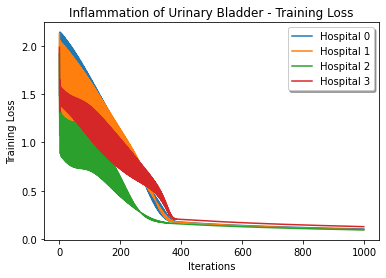

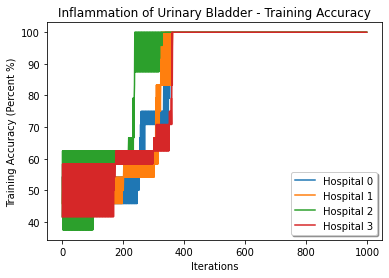


Testing Accuracy = 100.00%


In [ ]:
model = federated_learning(DFL_title, client_devices_features, client_devices_targets, test_input, test_output)